In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [23]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [24]:
df = pd.read_excel('Main Data.xlsx')
original = df.copy()

In [25]:
df.shape

(1189, 11)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gender                           1189 non-null   object 
 1   Branch                           1189 non-null   object 
 2   10th Percentage                  1189 non-null   float64
 3   10th Year of Passing             1189 non-null   int64  
 4   12th Or Diploma                  1189 non-null   object 
 5   12th or Diploma Percentage       1189 non-null   float64
 6   12th or Diploma Year of Passing  1189 non-null   int64  
 7   BE CGPI                          1189 non-null   float64
 8   Offers                           1189 non-null   object 
 9   Package                          1189 non-null   float64
 10  Year Of Placement                1189 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 102.3+ KB


In [27]:
columns_to_describe = ['10th Percentage', '12th or Diploma Percentage', 'BE CGPI', 'Package']

df[columns_to_describe].describe()

,10th Percentage,12th or Diploma Percentage,BE CGPI,Package
count,1189.000000,1189.000000,1189.000000,1189.000000
mean,86.476140,75.491421,8.756263,4.988688
std,6.909272,9.408731,0.746651,1.903742
min,58.800000,48.770000,6.460000,0.000000
25%,82.800000,68.150000,8.250000,4.000000
50%,87.800000,75.230000,8.860000,4.250000
75%,91.600000,82.770000,9.350000,6.000000
max,99.000000,97.770000,10.000000,17.950000


In [28]:
df.describe(include = 'O').T

,count,unique,top,freq
Gender,1189,2,Male,865
Branch,1189,6,Computer Engineering,380
12th Or Diploma,1189,2,12th,1057
Offers,1189,151,TCS(Ninja),130


In [29]:
df.head()

,Gender,Branch,10th Percentage,10th Year of Passing,12th Or Diploma,12th or Diploma Percentage,12th or Diploma Year of Passing,BE CGPI,Offers,Package,Year Of Placement
0,Male,Computer Engineering,79.8,2018,12th,68.92,2020,8.63,63 Moons Technologies Limited,4.0,2024
1,Male,Information Technology,78.2,2018,Diploma,82.81,2021,7.50,63 Moons Technologies Limited,4.0,2024
2,Male,Computer Science and Business System,91.8,2018,12th,76.62,2020,9.66,63 Moons Technologies Limited,4.0,2024
3,Female,Computer Science and Business System,79.2,2018,12th,61.69,2020,8.30,63 Moons Technologies Limited,4.0,2024
4,Male,Information Technology,88.0,2018,12th,68.75,2018,8.99,63 Moons Technologies Limited,4.0,2024


In [30]:
df.isnull().sum()

Gender                             0
Branch                             0
10th Percentage                    0
10th Year of Passing               0
12th Or Diploma                    0
12th or Diploma Percentage         0
12th or Diploma Year of Passing    0
BE CGPI                            0
Offers                             0
Package                            0
Year Of Placement                  0
dtype: int64

In [31]:
df.columns = df.columns.str.strip()
df.groupby('Year Of Placement')['Package'].count()

Year Of Placement
2022    538
2023    471
2024    180
Name: Package, dtype: int64

In [32]:
df.groupby('Branch')['Package'].mean()

Branch
Computer Engineering                             5.317579
Computer Science and Business System             5.353913
Electronics Engineering                          4.621262
Electronics and Telecommunication Engineering    4.855804
Information Technology                           5.026465
Instrumentation Engineering                      4.495208
Name: Package, dtype: float64

In [33]:
mean_package_by_year_branch = df.groupby(['Year Of Placement', 'Branch'])['Package'].mean()

mean_package_by_year_branch

Year Of Placement  Branch                                       
2022               Computer Engineering                             5.321923
                   Electronics Engineering                          4.834375
                   Electronics and Telecommunication Engineering    4.985965
                   Information Technology                           4.932258
                   Instrumentation Engineering                      4.653750
2023               Computer Engineering                             4.965766
                   Electronics Engineering                          4.367340
                   Electronics and Telecommunication Engineering    4.701314
                   Information Technology                           4.940920
                   Instrumentation Engineering                      4.178125
2024               Computer Engineering                             5.739115
                   Computer Science and Business System             5.353913
           

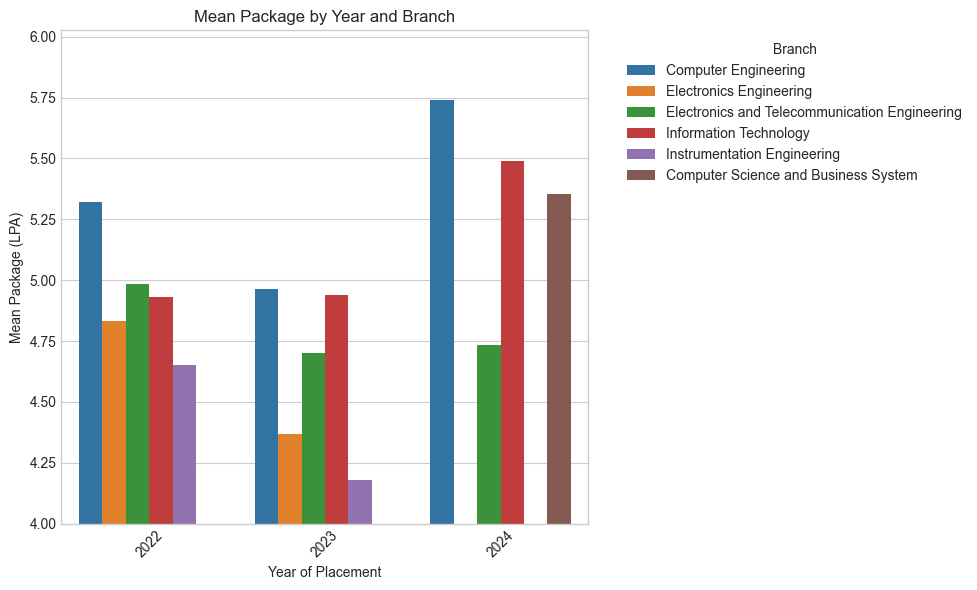

In [34]:
mean_package_by_year_branch = mean_package_by_year_branch.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year Of Placement', y='Package', hue='Branch', data=mean_package_by_year_branch)

plt.title('Mean Package by Year and Branch')
plt.xlabel('Year of Placement')
plt.ylabel('Mean Package (LPA)')
plt.xticks(rotation=45)
plt.legend(title='Branch', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.ylim(4, None)

plt.tight_layout()
plt.show()


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
features = ['10th Percentage', '12th or Diploma Percentage', 'BE CGPI']
target = 'Package'

In [37]:
scaler = StandardScaler()  
df[features] = scaler.fit_transform(df[features])

In [38]:
correlation_matrix = df[features + [target]].corr()
correlation_matrix

,10th Percentage,12th or Diploma Percentage,BE CGPI,Package
10th Percentage,1.000000,0.316096,0.160171,0.114163
12th or Diploma Percentage,0.316096,1.000000,0.242463,0.150886
BE CGPI,0.160171,0.242463,1.000000,0.140699
Package,0.114163,0.150886,0.140699,1.000000


In [39]:
sorted_corr = correlation_matrix[target].sort_values(ascending=False)
print(sorted_corr)


Package                       1.000000
12th or Diploma Percentage    0.150886
BE CGPI                       0.140699
10th Percentage               0.114163
Name: Package, dtype: float64


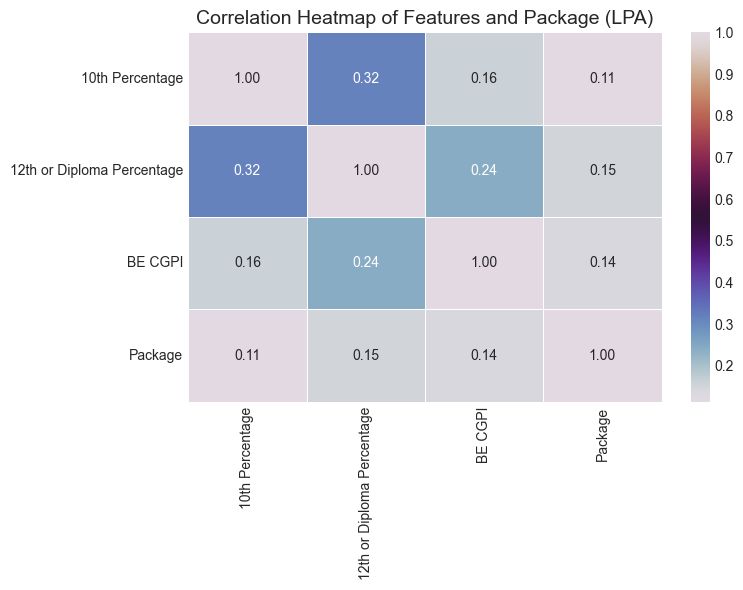

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='twilight', fmt='.2f', linewidths=0.5)

plt.title('Correlation Heatmap of Features and Package (LPA)', fontsize=14)

plt.tight_layout()
plt.show()

In [41]:
from scipy.stats import pearsonr

# Example correlation between 10th Percentage and Package
correlation, p_value = pearsonr(df['12th or Diploma Percentage'], df['Package'])
print(f"Correlation: {correlation}, P-value: {p_value}")


Correlation: 0.15088636905108216, P-value: 1.7197771816256263e-07


In [43]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [44]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [45]:
scaler = StandardScaler()
df[['10th Percentage', '12th or Diploma Percentage', 'BE CGPI']] = scaler.fit_transform(
    df[['10th Percentage', '12th or Diploma Percentage', 'BE CGPI']]
)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

linear regression

In [47]:
X = df[['Gender', '10th Percentage', '12th or Diploma Percentage', 'BE CGPI']]
y = df['Package']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

In [51]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [52]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")

Mean Absolute Error (MAE): 1.342129969787081
Mean Squared Error (MSE): 2.8480926584080426
Root Mean Squared Error (RMSE): 1.6876293012412538
R-squared (R2 Score): -0.001882106931354155


decision tree

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [55]:
y_pred = tree_model.predict(X_test)

In [56]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")

Mean Absolute Error (MAE): 2.024159663865546
Mean Squared Error (MSE): 8.650684453781514
Root Mean Squared Error (RMSE): 2.9412045923025336
R-squared (R2 Score): -2.04307724728218


random forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [59]:
# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [5, 10, 15],                # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],         # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]            # Minimum samples required to be at a leaf node
}

# Initialize RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the tuned Random Forest model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Tuned Mean Absolute Error (MAE): {mae}")
print(f"Tuned Mean Squared Error (MSE): {mse}")
print(f"Tuned Root Mean Squared Error (RMSE): {rmse}")
print(f"Tuned R-squared (R2 Score): {r2}")
print("Best Parameters:", grid_search.best_params_)

Tuned Mean Absolute Error (MAE): 1.3120775330162244
Tuned Mean Squared Error (MSE): 2.780286003623596
Tuned Root Mean Squared Error (RMSE): 1.6674189646347424
Tuned R-squared (R2 Score): 0.021970443637481796
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


gradient boosting

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
param_grid = {
    'n_estimators': [100, 200, 300],      # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.05, 0.1],   # Step size for each boosting step
    'max_depth': [3, 5, 7],               # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],      # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]         # Minimum samples required at each leaf node
}

# Initialize GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_gb_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_gb_model.predict(X_test)

# Evaluate the tuned Gradient Boosting model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")
print("Best Parameters:", grid_search.best_params_)

Mean Absolute Error (MAE): 1.3268518333778727
Mean Squared Error (MSE): 2.79849387217479
Root Mean Squared Error (RMSE): 1.6728699507656863
R-squared (R2 Score): 0.015565407041166934
Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


xgboost

In [69]:
!pip install xgboost
import xgboost as xgb

In [72]:
# Initialize the XGBoost Regressor
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Use GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=3, verbose=1, n_jobs=-1)

# Fit the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters: ", grid_search.best_params_)

# Best model after tuning
best_xgboost_model = grid_search.best_estimator_

# Predict on the test set
y_pred_xgboost = best_xgboost_model.predict(X_test)

# Evaluate the model
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mse_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)

# Print evaluation metrics
print(f"\nXGBoost - MAE: {mae_xgboost}")
print(f"XGBoost - MSE: {mse_xgboost}")
print(f"XGBoost - RMSE: {rmse_xgboost}")
print(f"XGBoost - R2: {r2_xgboost}")

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
Best Parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 200, 'subsample': 0.7}

XGBoost - MAE: 1.318538100619276
XGBoost - MSE: 2.758930619814409
XGBoost - RMSE: 1.6610028957874845
XGBoost - R2: 0.02948269112771451


adaboost

In [73]:
from sklearn.ensemble import AdaBoostRegressor

In [74]:
# Initialize the AdaBoost Regressor
adaboost_model = AdaBoostRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Use GridSearchCV to tune the hyperparameters
grid_search_adaboost = GridSearchCV(estimator=adaboost_model, param_grid=param_grid_adaboost, 
                                    scoring='neg_mean_absolute_error', cv=3, verbose=1, n_jobs=-1)

# Fit the grid search to find the best hyperparameters
grid_search_adaboost.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters for AdaBoost: ", grid_search_adaboost.best_params_)

# Best model after tuning
best_adaboost_model = grid_search_adaboost.best_estimator_

# Predict on the test set
y_pred_adaboost = best_adaboost_model.predict(X_test)

# Evaluate the model
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
rmse_adaboost = np.sqrt(mse_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

# Print evaluation metrics
print(f"\nAdaBoost - MAE: {mae_adaboost}")
print(f"AdaBoost - MSE: {mse_adaboost}")
print(f"AdaBoost - RMSE: {rmse_adaboost}")
print(f"AdaBoost - R2: {r2_adaboost}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters for AdaBoost:  {'learning_rate': 0.01, 'n_estimators': 50}

AdaBoost - MAE: 1.3193411692721855
AdaBoost - MSE: 2.769415877312598
AdaBoost - RMSE: 1.6641562058029884
AdaBoost - R2: 0.02579426061159673


voting regressor

In [79]:
from sklearn.ensemble import VotingRegressor

In [81]:
from xgboost import XGBRegressor

In [ ]:
# Initialize the models
adaboost_model = AdaBoostRegressor(learning_rate=0.01, n_estimators=50, random_state=42)
xgboost_model = XGBRegressor(colsample_bytree=0.7, learning_rate=0.01, max_depth=3, 
                             min_child_weight=5, n_estimators=200, subsample=0.7, random_state=42)
gbm_model = GradientBoostingRegressor(learning_rate=0.01, max_depth=3, min_samples_leaf=1, 
                                      min_samples_split=2, n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=10, 
                                 n_estimators=200, random_state=42)

In [ ]:
voting_regressor = VotingRegressor(estimators=[
    ('adaboost', adaboost_model),
    ('xgboost', xgboost_model),
    ('gbm', gbm_model),
    ('random_forest', rf_model)
])
voting_regressor

VotingRegressor(estimators=[('adaboost',
                             AdaBoostRegressor(learning_rate=0.01,
                                               random_state=42)),
                            ('xgboost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=0.7, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_polic...
                                          max_leaves=None, min_child_weight=5,
                                          missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=200,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=42, ...)),
                            ('gbm',
                             GradientBoostingRegressor(learning_rate=0.01,
                                                       random_state=42)),
                            ('random_forest',
                             RandomForestRegressor(max_depth=5,
                                                   min_samples_leaf=4,
                                                   min_samples_split=10,
                                                   n_estimators=200,
                                                   random_state=42))])

In [ ]:
voting_regressor.fit(X_train, y_train)

y_pred_voting = voting_regressor.predict(X_test)

# Evaluate the model
mae_voting = mean_absolute_error(y_test, y_pred_voting)
mse_voting = mean_squared_error(y_test, y_pred_voting)
rmse_voting = np.sqrt(mse_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print(f"\nVoting Regressor - MAE: {mae_voting}")
print(f"Voting Regressor - MSE: {mse_voting}")
print(f"Voting Regressor - RMSE: {rmse_voting}")
print(f"Voting Regressor - R2: {r2_voting}")


Voting Regressor - MAE: 1.3167701395211002
Voting Regressor - MSE: 2.7603767353913184
Voting Regressor - RMSE: 1.661438152743375
Voting Regressor - R2: 0.028973986708712318
